# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

Answer to 11.1.1:
To model this you would need 2 equations, you would need the equations for changes in susceptible and infected with regards to time.
$\frac{dS}{dt}=\gamma I - \beta SI$ and the other 
$\frac{dI}{dt}=\beta SI-\gamma I $

the first equation states the differences in the number of susceptible people. This is the number of susceptible that becomes sick so they arent susceptible anymore and the amount of infected people becoming healthy who can now contract the disease again. The other is the oposite.



> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.


$\frac{dS}{dt}=\theta R-\beta SI$, $\frac{dI}{dt}=\beta SI-\gamma I $ and $\frac{dR}{dt}=\gamma I -  \theta R$

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

For A: 70 pct. For B 15 pct., For C 44 pct.


The probabilty of choosing each node in A is 1/N regardless of degree. when picking random neighbors the probability of being picked dedpend on the node degree. High degree person are therefore more likely to be vaccinated.


The variation in BA networks are higher.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

When analyzing the second exploreable, i found this to be a representation of the SIRS model. By changing transmission rates you can see what happens in the model.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [2]:
G = nx.connected_caveman_graph(10, 5)
# _ = nw.visualize(G) # Uncomment if you want to have a look at the network

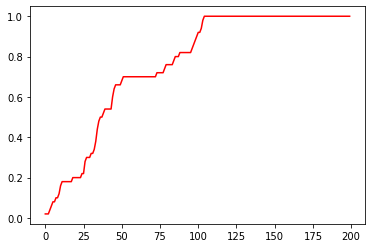

In [3]:
p_I = 0.1
n_iter = 200

I = set()
S = set(G.nodes())

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)


I_dict = {}
S_dict = {}
for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors
        I_dict[t] = len(I)
        S_dict[t] = len(S)

    
import matplotlib.pyplot as plt


# plot of the fractions - as we assume no individuals leave the system/model:
i_list = np.divide(np.array(list(I_dict.values())), len(G.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red')
#plt.plot(list(S_dict.keys()),s_list, color='green')
plt.show()

I start of the procces by defining a network of ten cliques, which are connected communities, and in each clique there are 5 nodes.
Then the disease is modelled, and every of the fifty nodes are set to be susceptible to the disease.
Then a random starting node is chosen, this node is the first infected node.

It then tries to infect the neighbours of every infected node, in the first period only one, in each of the two hundred iterations.

When looking at the graph, we see how the fraction of infected nodes increases for every iteration until we have reached a fully infected system where every node is infected. There is no development from this point on.

The reasoning for this is that the system has no way of recovery incorperated. So if you have contracted this disease then there is no way of getting rid of it again. This, coupled with an infections system guarentees that everyone will be infected at one point. In my model its just before the 75´th iteration.


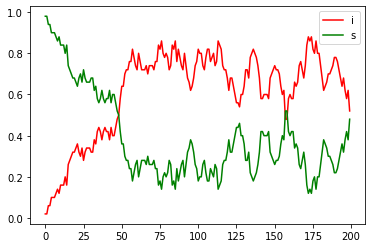

In [4]:

# Adjusting the code such that after T_i = 10, then induviduals start to recover again.

import numpy as np
p_I = 0.1
n_iter = 200
keep_track = [set()] * n_iter
T_I = 10

I = set()
S = set(G.nodes())

patient0 = np.random.choice(list(S))

I.add(patient0)
keep_track[T_I - 1] = I
S.remove(patient0)


I_dict = {}
S_dict = {}
for t in range(n_iter):
    
    I = I - keep_track[t]
    S = S | keep_track[t]
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
     
        try:
            keep_track[t + T_I] = keep_track[t + T_I] | (infected_neighbors - I)
        except:
            pass
        I |= infected_neighbors 
        S -= infected_neighbors    
    I_dict[t] = len(I) 
    S_dict[t] = len(S) 


i_list = np.divide(np.array(list(I_dict.values())), len(G.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red', label = 'i')
plt.plot(list(S_dict.keys()),s_list, color='green', label = 's')
plt.legend()
plt.show()

In this model we see that there are a similar trend of more and more people getting infected but we do not end up with everyone being infected in this model.

In this model there will allways be a certain group of the infected the becomes cured in each itereation so there will continue to be some development in this system for every iteration, even beyond the 200 shown.


> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [5]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import gzip

# Importing facebook data once again

data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)


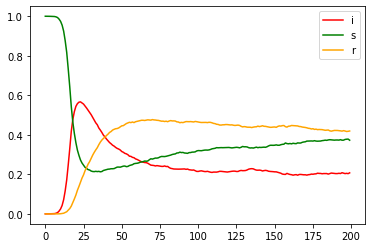

In [6]:
# Simulating a SIRS model - SIRS model on facebook data

# Creating the network from the facebook data
data_sliced = data[:20000]
t0 = data_sliced.timestamp.max() - 86400 * 365
t1 = data_sliced.timestamp.max()    
data = data.loc[data.timestamp.between(t0, t1)]
G_w = nx.from_pandas_edgelist(data, 'user1', 'user2')


p_S = 0.02 # prob of going from immune to susceptible
p_R = 0.04 # prob of recover from being infected
p_I = 0.3 # prob of being infected when susceptible
n_iter = 200 # number of iterations

I = set()
R = set()
S = set(G_w.nodes())

# Cho0se a random individual
patient0 = np.random.choice(list(S))

# We infect patient0 and remove him/her from the susceptible group
I.add(patient0)
S.remove(patient0)

# Define dictionaries for store individuals in the 3 groups, where I apply the time stamp t as key
I_dict = {}
S_dict = {}
R_dict = {}

for t in range(n_iter):
    
    # from S to I
    from_S_to_I_t = set()
    for infected_node in list(I): 
            neighbors = G_w.neighbors(infected_node)
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
            from_S_to_I_t |= infected_neighbors.intersection(S) # Only individuals that are susceptible that can be infected now      
        
    # from I to R:
    from_I_to_R_t = set([n for n in I if np.random.random() < p_R])
    
    # from R to S:
    from_R_to_S_t = set([n for n in R if np.random.random() < p_S])
    
    # Making the adustmets for compartments in timestep t
    I |= from_S_to_I_t
    S |= from_R_to_S_t
    R |= from_I_to_R_t
    I -= from_I_to_R_t
    S -= from_S_to_I_t
    R -= from_R_to_S_t

    # Storing number of individuals in the compartments at time t
    I_dict[t] = len(I)
    S_dict[t] = len(S)
    R_dict[t] = len(R)


# plot of the fractions - as we assume no individuals leave the system/model:
i_list = np.divide(np.array(list(I_dict.values())), len(G_w.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G_w.nodes()))
r_list = np.divide(np.array(list(R_dict.values())), len(G_w.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red', label = "i")
plt.plot(list(S_dict.keys()),s_list, color='green', label = 's')
plt.plot(list(R_dict.keys()),r_list, color='orange', label = 'r')
plt.legend()
plt.show()

This model shows a huge spike of infected people in the system which is then followed by a decrease in the rate of infection as people start recovering, some of theese recovered people might become susceptable again but not all, which means we go towards a different long term equlibrium than in the other models. In this model we see that there will be some susceptible and some infected people in the system in every time period but allmost half of the nodes in the system are recovred and will be immune to the infection going forward. This is somewhat representable of alot of diseases in the real world as some tend to become immune, or atleast more resistant, than others after having contracted a disease.


### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.